In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [13]:
pca_scale_50_X_train = np.load('pca_scale_50_X_train.npy')
y_train = np.load('y_train.npy')

In [14]:
pca_scale_50_X_train, pca_scale_50_X_val, y_train, y_val = train_test_split(pca_scale_50_X_train, y_train, test_size=0.20, random_state=42)
print(f'Train set shape: {pca_scale_50_X_train.shape}, Train labels shape: {y_train.shape}')
print(f'Validation set shape: {pca_scale_50_X_val.shape}, Validation labels shape: {y_val.shape}')

Train set shape: (48000, 50), Train labels shape: (48000,)
Validation set shape: (12000, 50), Validation labels shape: (12000,)


In [15]:
log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
log_reg.fit(pca_scale_50_X_train, y_train)

e:\hcmus\5th-semester\PRML-Lab01-classification-with-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [16]:
y_pred_log_reg = log_reg.predict(pca_scale_50_X_val)

In [17]:
accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
precision_log_reg = precision_score(y_val, y_pred_log_reg, average='weighted')
recall_log_reg = recall_score(y_val, y_pred_log_reg, average='weighted')
f1_log_reg = f1_score(y_val, y_pred_log_reg, average='weighted')

print(f'Accuracy: {accuracy_log_reg:.2f}')
print(f'Precision: {precision_log_reg:.2f}')
print(f'Recall: {recall_log_reg:.2f}')
print(f'F1 Score: {f1_log_reg:.2f}')

Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


In [18]:
print("\nClassification Report:\n", classification_report(y_val, y_pred_log_reg))


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1202
           1       0.98      0.95      0.97      1219
           2       0.75      0.72      0.73      1205
           3       0.82      0.86      0.84      1184
           4       0.72      0.75      0.73      1202
           5       0.93      0.93      0.93      1211
           6       0.59      0.56      0.58      1218
           7       0.91      0.92      0.92      1159
           8       0.94      0.93      0.94      1197
           9       0.94      0.95      0.94      1203

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000



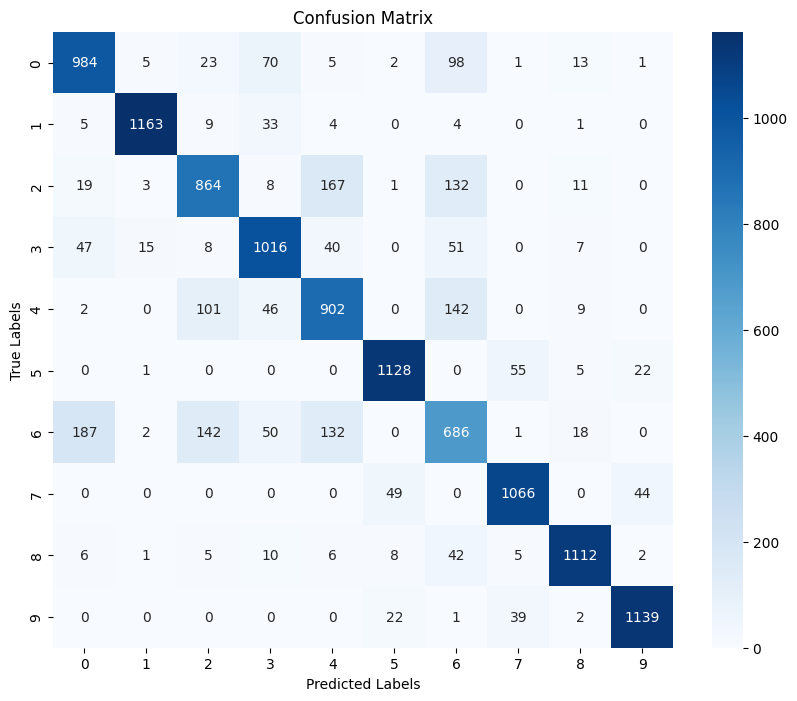

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_log_reg)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [20]:
svm_linear = SVC(kernel="linear", C=1.0)
svm_linear.fit(pca_scale_50_X_train, y_train)

SVC(kernel='linear')

In [25]:
y_pred_svm_linear = svm_linear.predict(pca_scale_50_X_val)


In [26]:
accuracy_svm_linear = accuracy_score(y_val, y_pred_svm_linear)
precision_svm_linear = precision_score(y_val, y_pred_svm_linear, average='weighted')
recall_svm_linear = recall_score(y_val, y_pred_svm_linear, average='weighted')
f1_svm_linear = f1_score(y_val, y_pred_svm_linear, average='weighted')

print(f'Accuracy: {accuracy_svm_linear:.2f}')
print(f'Precision: {precision_svm_linear:.2f}')
print(f'Recall: {recall_svm_linear:.2f}')
print(f'F1 Score: {f1_svm_linear:.2f}')

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85


In [27]:
print("\nClassification Report:\n", classification_report(y_val, y_pred_svm_linear))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.81      1202
           1       0.98      0.96      0.97      1219
           2       0.76      0.74      0.75      1205
           3       0.84      0.88      0.86      1184
           4       0.75      0.76      0.76      1202
           5       0.94      0.93      0.94      1211
           6       0.64      0.57      0.60      1218
           7       0.91      0.93      0.92      1159
           8       0.95      0.94      0.95      1197
           9       0.96      0.94      0.95      1203

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



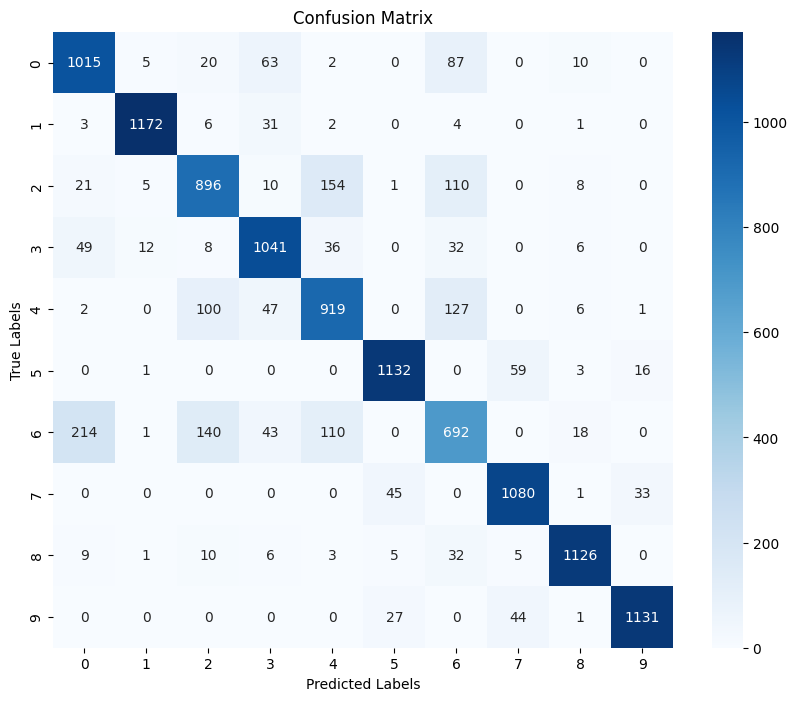

In [28]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_svm_linear)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [29]:
svm_rbf = SVC(kernel="rbf", gamma=0.5, C=1.0)
svm_rbf.fit(pca_scale_50_X_train, y_train)

SVC(gamma=0.5)

In [30]:
y_pred_svm_rbf = svm_rbf.predict(pca_scale_50_X_val)


In [31]:
accuracy_svm_rbf = accuracy_score(y_val, y_pred_svm_rbf)
precision_svm_rbf = precision_score(y_val, y_pred_svm_rbf, average='weighted')
recall_svm_rbf = recall_score(y_val, y_pred_svm_rbf, average='weighted')
f1_svm_rbf = f1_score(y_val, y_pred_svm_rbf, average='weighted')

print(f'Accuracy: {accuracy_svm_rbf:.2f}')
print(f'Precision: {precision_svm_rbf:.2f}')
print(f'Recall: {recall_svm_rbf:.2f}')
print(f'F1 Score: {f1_svm_rbf:.2f}')

Accuracy: 0.75
Precision: 0.83
Recall: 0.75
F1 Score: 0.77


In [32]:
print("\nClassification Report:\n", classification_report(y_val, y_pred_svm_rbf))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.67      0.76      1202
           1       1.00      0.86      0.92      1219
           2       0.73      0.76      0.75      1205
           3       0.92      0.74      0.82      1184
           4       0.80      0.68      0.74      1202
           5       0.94      0.68      0.79      1211
           6       0.76      0.50      0.60      1218
           7       0.97      0.83      0.90      1159
           8       0.38      0.99      0.55      1197
           9       0.95      0.77      0.85      1203

    accuracy                           0.75     12000
   macro avg       0.83      0.75      0.77     12000
weighted avg       0.83      0.75      0.77     12000



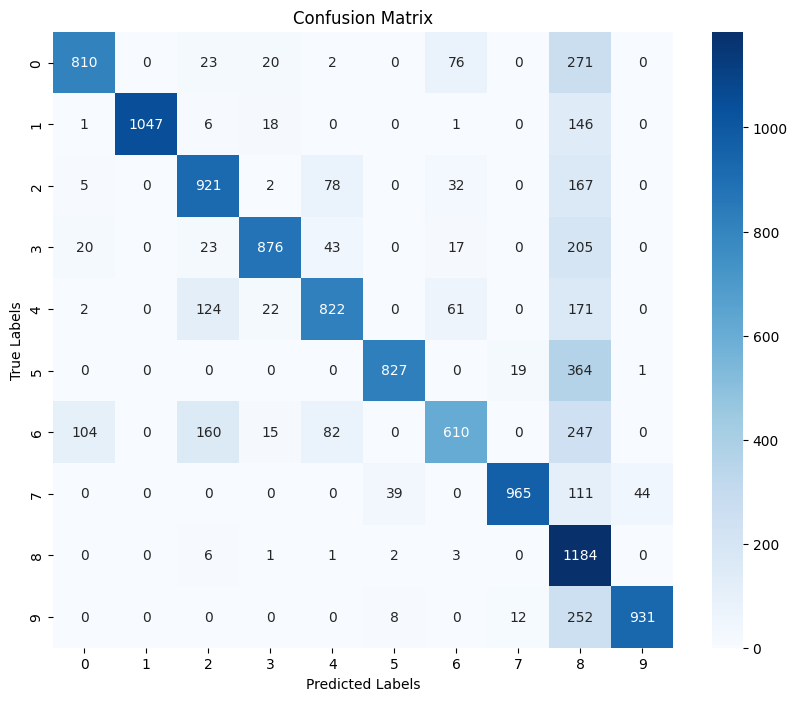

In [33]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_svm_rbf)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
import pickle

with open('log_reg_after_dimension_reduction_50.pkl', 'wb') as file:
    pickle.dump(log_reg, file)

with open('svm_linear_after_dimension_reduction_50.pkl', 'wb') as file:
    pickle.dump(svm_linear, file)

with open('svm_rbf_after_dimension_reduction_50.pkl', 'wb') as file:
    pickle.dump(svm_rbf, file)

In [36]:
import pandas as pd

# Create a dictionary with your metrics
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg],
    'SVM (Linear Kernel)': [accuracy_svm_linear, precision_svm_linear, recall_svm_linear, f1_svm_linear],
    'SVM (RBF Kernel)': [accuracy_svm_rbf, precision_svm_rbf, recall_svm_rbf, f1_svm_rbf],
}

# Create a DataFrame
metrics_df = pd.DataFrame(data)

# Display the DataFrame
print(metrics_df)


      Metric  Logistic Regression  SVM (Linear Kernel)  SVM (RBF Kernel)
0   Accuracy             0.838333             0.850333          0.749417
1  Precision             0.837899             0.849193          0.831382
2     Recall             0.838333             0.850333          0.749417
3   F1 Score             0.837917             0.849301          0.767450


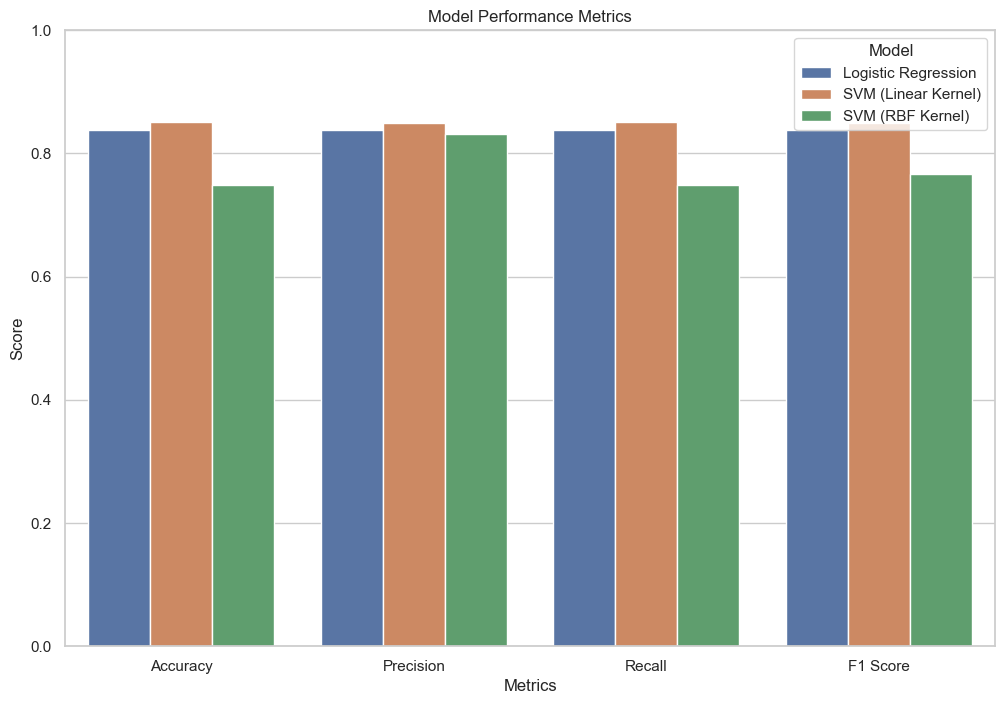

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Melt the DataFrame for better visualization
metrics_melted = metrics_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
sns.barplot(data=metrics_melted, x='Metric', y='Score', hue='Model')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)  
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.legend(title='Model')
plt.show()